In [1]:
pip install tensorflow ultralytics matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Dataset path
dataset_path = r"E:\Research\dev\New_Dataset\New DataSet_object"


In [9]:
train_datagen = ImageDataGenerator(rescale=1.0 / 255.0, validation_split=0.3)

train_generator = train_datagen.flow_from_directory(
    dataset_path, target_size=(224, 224), batch_size=32, class_mode='binary', subset='training'
)

test_generator = train_datagen.flow_from_directory(
    dataset_path, target_size=(224, 224), batch_size=32, class_mode='binary', subset='validation'
)


Found 9033 images belonging to 2 classes.
Found 3870 images belonging to 2 classes.


In [11]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [13]:
# Compile and train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

C:\Users\ASUS VIVOBOOK\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 21/283 ━━━━━━━━━━━━━━━━━━━━ 13:04 3s/step - accuracy: 0.6711 - loss: 1.5091

C:\ProgramData\anaconda3\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


283/283 ━━━━━━━━━━━━━━━━━━━━ 1207s 4s/step - accuracy: 0.9142 - loss: 0.3365 - val_accuracy: 0.9669 - val_loss: 0.1066
Epoch 2/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 1271s 4s/step - accuracy: 0.9947 - loss: 0.0170 - val_accuracy: 0.9649 - val_loss: 0.1441
Epoch 3/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 1632s 6s/step - accuracy: 0.9988 - loss: 0.0057 - val_accuracy: 0.9530 - val_loss: 0.2304
Epoch 4/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 2973s 11s/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.9654 - val_loss: 0.1742
Epoch 5/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 3609s 13s/step - accuracy: 1.0000 - loss: 5.7378e-04 - val_accuracy: 0.9667 - val_loss: 0.1778
Epoch 6/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 1266s 4s/step - accuracy: 1.0000 - loss: 2.4975e-04 - val_accuracy: 0.9682 - val_loss: 0.1737
Epoch 7/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 1295s 5s/step - accuracy: 1.0000 - loss: 1.7789e-04 - val_accuracy: 0.9667 - val_loss: 0.1889
Epoch 8/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 1412s 5s/step - accuracy: 1.0000 - loss: 1.3143

121/121 ━━━━━━━━━━━━━━━━━━━━ 334s 3s/step - accuracy: 0.9673 - loss: 0.2347
Model Accuracy: 0.9671834707260132
121/121 ━━━━━━━━━━━━━━━━━━━━ 408s 3s/step
              precision    recall  f1-score   support

       copra       0.48      1.00      0.65      1849
   non copra       0.00      0.00      0.00      2021

    accuracy                           0.48      3870
   macro avg       0.24      0.50      0.32      3870
weighted avg       0.23      0.48      0.31      3870



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


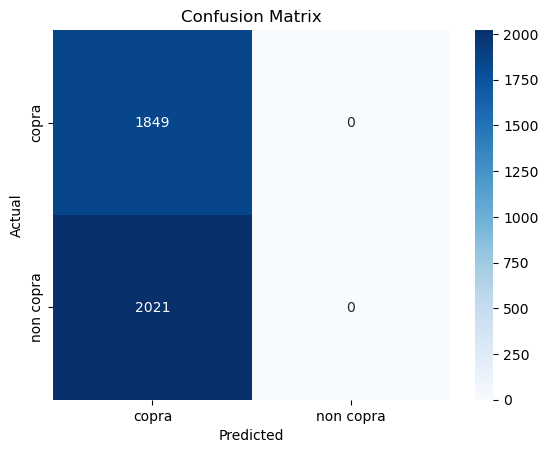

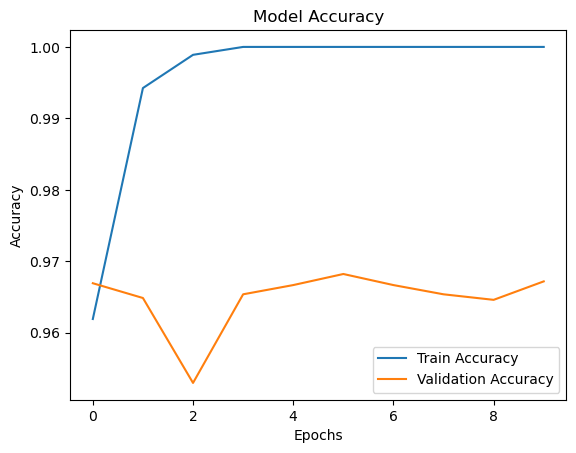

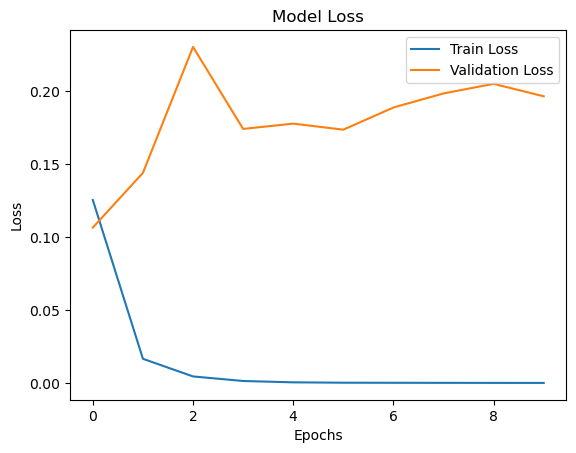

In [15]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f"Model Accuracy: {accuracy}")

# Classification report
predictions = np.argmax(model.predict(test_generator), axis=-1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
print(classification_report(y_true, predictions, target_names=class_labels))

# Confusion matrix
cm = confusion_matrix(y_true, predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot accuracy and loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
